# Hierarchical clustering

## Setup

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from katlas.core import *
from katlas.feature import *
from katlas.plot import *

from scipy.cluster.hierarchy import linkage, dendrogram, to_tree,fcluster

from Bio import Phylo
from io import StringIO

In [ ]:
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

In [ ]:
# Define a function to convert the tree to Newick format
def to_newick(df, tree):
    if tree.is_leaf():
        return df.index[tree.id]
    else:
        return '(' + to_newick(df, tree.left) + ', ' + to_newick(df, tree.right) + ')'

def get_linkage(df, # index is kinase
                plot=False, 
                save=None):
    
    linkage_matrix = linkage(df, method='ward')
    
    if plot:
    
        # Get tree
        tree = to_tree(linkage_matrix)

        # Convert the tree to Newick format
        newick_str = to_newick(df, tree)
        
        # Save the Newick string to a file
        if save is not None:
            with open(f'{save}.newick', 'w') as f:
                f.write(newick_str)# Open the tree.newick in figtree
                

        # Plot the tree using Bio.Phylo
        tree = Phylo.read(StringIO(newick_str), "newick")

        # Create a new figure and a subplot
        fig, ax = plt.subplots(figsize=(10, 50), dpi=100)

        # Draw the tree
        Phylo.draw(tree, axes=ax)
        
        
        # below is another way of plot
        # plt.figure(figsize=(10, 6))
        # dendrogram(linkage_matrix)
        # plt.xlabel('Samples')
        # plt.ylabel('Distance')
        # plt.title('Hierarchical Clustering Dendrogram')
        # plt.show()
        
    return linkage_matrix

In [ ]:
def get_hcluster(linkage_matrix, q = 0.95):
    
    # get third column of linkage_matrix
    distance = linkage_matrix[:,2] 
    
    # get threshold t that cut tree in fcluster
    threshold = int(np.quantile(distance, q))
    
    # cut tree
    cluster = fcluster(linkage_matrix, t=threshold, criterion='distance')
    
    return cluster

## Data

In [ ]:
main = Data.get_ks().iloc[:,:-3].round(6)

In [ ]:
main

,-7P,-7G,-7A,-7C,-7S,-7T,-7V,-7I,-7L,-7M,-7F,-7Y,-7W,-7H,-7K,-7R,-7Q,-7N,-7D,-7E,-7s,-7t,-7y,-6P,-6G,-6A,-6C,-6S,-6T,-6V,-6I,-6L,-6M,-6F,-6Y,-6W,-6H,-6K,-6R,-6Q,-6N,-6D,-6E,-6s,-6t,-6y,-5P,-5G,-5A,-5C,-5S,-5T,-5V,-5I,-5L,-5M,-5F,-5Y,-5W,-5H,-5K,-5R,-5Q,-5N,-5D,-5E,-5s,-5t,-5y,-4P,-4G,-4A,-4C,-4S,-4T,-4V,-4I,-4L,-4M,-4F,-4Y,-4W,-4H,-4K,-4R,-4Q,-4N,-4D,-4E,-4s,-4t,-4y,-3P,-3G,-3A,-3C,-3S,-3T,-3V,-3I,-3L,-3M,-3F,-3Y,-3W,-3H,-3K,-3R,-3Q,-3N,-3D,-3E,-3s,-3t,-3y,-2P,-2G,-2A,-2C,-2S,-2T,-2V,-2I,-2L,-2M,-2F,-2Y,-2W,-2H,-2K,-2R,-2Q,-2N,-2D,-2E,-2s,-2t,-2y,-1P,-1G,-1A,-1C,-1S,-1T,-1V,-1I,-1L,-1M,-1F,-1Y,-1W,-1H,-1K,-1R,-1Q,-1N,-1D,-1E,-1s,-1t,-1y,1P,1G,1A,1C,1S,1T,1V,1I,1L,1M,1F,1Y,1W,1H,1K,1R,1Q,1N,1D,1E,1s,1t,1y,2P,2G,2A,2C,2S,2T,2V,2I,2L,2M,2F,2Y,2W,2H,2K,2R,2Q,2N,2D,2E,2s,2t,2y,3P,3G,3A,3C,3S,3T,3V,3I,3L,3M,3F,3Y,3W,3H,3K,3R,3Q,3N,3D,3E,3s,3t,3y,4P,4G,4A,4C,4S,4T,4V,4I,4L,4M,4F,4Y,4W,4H,4K,4R,4Q,4N,4D,4E,4s,4t,4y,5P,5G,5A,5C,5S,5T,5V,5I,5L,5M,5F,5Y,5W,5H,5K,5R,5Q,5N,5D,5E,5s,5t,5y,6P,6G,6A,6C,6S,6T,6V,6I,6L,6M,6F,6Y,6W,6H,6K,6R,6Q,6N,6D,6E,6s,6t,6y,7P,7G,7A,7C,7S,7T,7V,7I,7L,7M,7F,7Y,7W,7H,7K,7R,7Q,7N,7D,7E,7s,7t,7y,0s,0t,0y
kinase,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SRC,0.050985,0.068752,0.056392,0.009270,0.045191,0.032831,0.047122,0.035535,0.084589,0.024334,0.029741,0.011974,0.009270,0.017767,0.093086,0.078795,0.043260,0.040942,0.075319,0.086906,0.025879,0.013132,0.018926,0.061366,0.069085,0.061752,0.010035,0.040139,0.032420,0.049016,0.045156,0.065612,0.017754,0.034736,0.007333,0.008491,0.021227,0.085681,0.060208,0.048630,0.038981,0.078734,0.097646,0.027403,0.016596,0.021999,0.048499,0.065050,0.066205,0.013472,0.033102,0.027329,0.044650,0.050038,0.071594,0.016551,0.032717,0.002694,0.008853,0.021555,0.075828,0.046959,0.046574,0.042725,0.089684,0.112779,0.029253,0.020785,0.033102,0.054573,0.078786,0.058417,0.015757,0.036126,0.023828,0.049577,0.037663,0.079170,0.015373,0.029593,0.004996,0.005380,0.019985,0.051499,0.053805,0.041507,0.043044,0.089547,0.105304,0.053420,0.020753,0.031899,0.049155,0.068356,0.074501,0.008065,0.029186,0.024962,0.052227,0.032258,0.053379,0.012673,0.022273,0.007296,0.008065,0.020353,0.058756,0.042627,0.058756,0.041475,0.093318,0.141321,0.043011,0.021889,0.036098,0.065643,0.080998,0.059885,0.010749,0.025720,0.017274,0.053743,0.035701,0.051056,0.010749,0.027639,0.003071,0.007294,0.023800,0.062188,0.033397,0.049520,0.054511,0.097121,0.106718,0.052975,0.033397,0.036852,0.057582,0.047601,0.064107,0.015739,0.020345,0.020345,0.101727,0.083301,0.094818,0.008445,0.038004,0.004990,0.007678,0.028023,0.034549,0.021881,0.036468,0.039539,0.065259,0.090979,0.033781,0.039923,0.044914,0.020015,0.099692,0.066205,0.013857,0.031563,0.014242,0.066590,0.051193,0.061971,0.014242,0.033872,0.003079,0.006543,0.019630,0.053118,0.031178,0.053503,0.039646,0.088530,0.115858,0.043110,0.030408,0.041955,0.049536,0.066563,0.071981,0.016641,0.031734,0.023220,0.071207,0.040635,0.075851,0.017802,0.031734,0.005031,0.010836,0.018963,0.039861,0.043344,0.045279,0.045666,0.070433,0.107198,0.047214,0.026316,0.042957,0.068765,0.057887,0.065268,0.015540,0.028749,0.021368,0.066434,0.050894,0.118104,0.017094,0.045066,0.011267,0.008159,0.026418,0.047786,0.054390,0.029915,0.039239,0.063714,0.068765,0.037685,0.020979,0.036519,0.056075,0.075156,0.065031,0.012072,0.031931,0.018302,0.063863,0.039330,0.070483,0.019860,0.032710,0.008956,0.008956,0.022975,0.080607,0.070093,0.038551,0.033879,0.068925,0.097352,0.030763,0.022975,0.031153,0.055490,0.081673,0.064869,0.007816,0.036342,0.031262,0.050410,0.032825,0.081282,0.014459,0.028918,0.012896,0.006252,0.019539,0.084408,0.069558,0.046893,0.033998,0.069949,0.090660,0.033998,0.022665,0.023837,0.060904,0.070334,0.078193,0.012967,0.03693

In [ ]:
# main = pd.read_excel('freq_main.xlsx').set_index('kinase')

In [ ]:
main.index

Index(['SRC', 'EPHA3', 'FES', 'NTRK3', 'ALK', 'EPHA8', 'ABL1', 'FLT3', 'EPHB2',
       'FYN',
       ...
       'MEK5', 'PKN2', 'MAP2K7', 'MRCKB', 'HIPK3', 'CDK8', 'BUB1', 'MEKK3',
       'MAP2K3', 'GRK1'],
      dtype='object', name='kinase', length=289)

## Visualize linkage tree

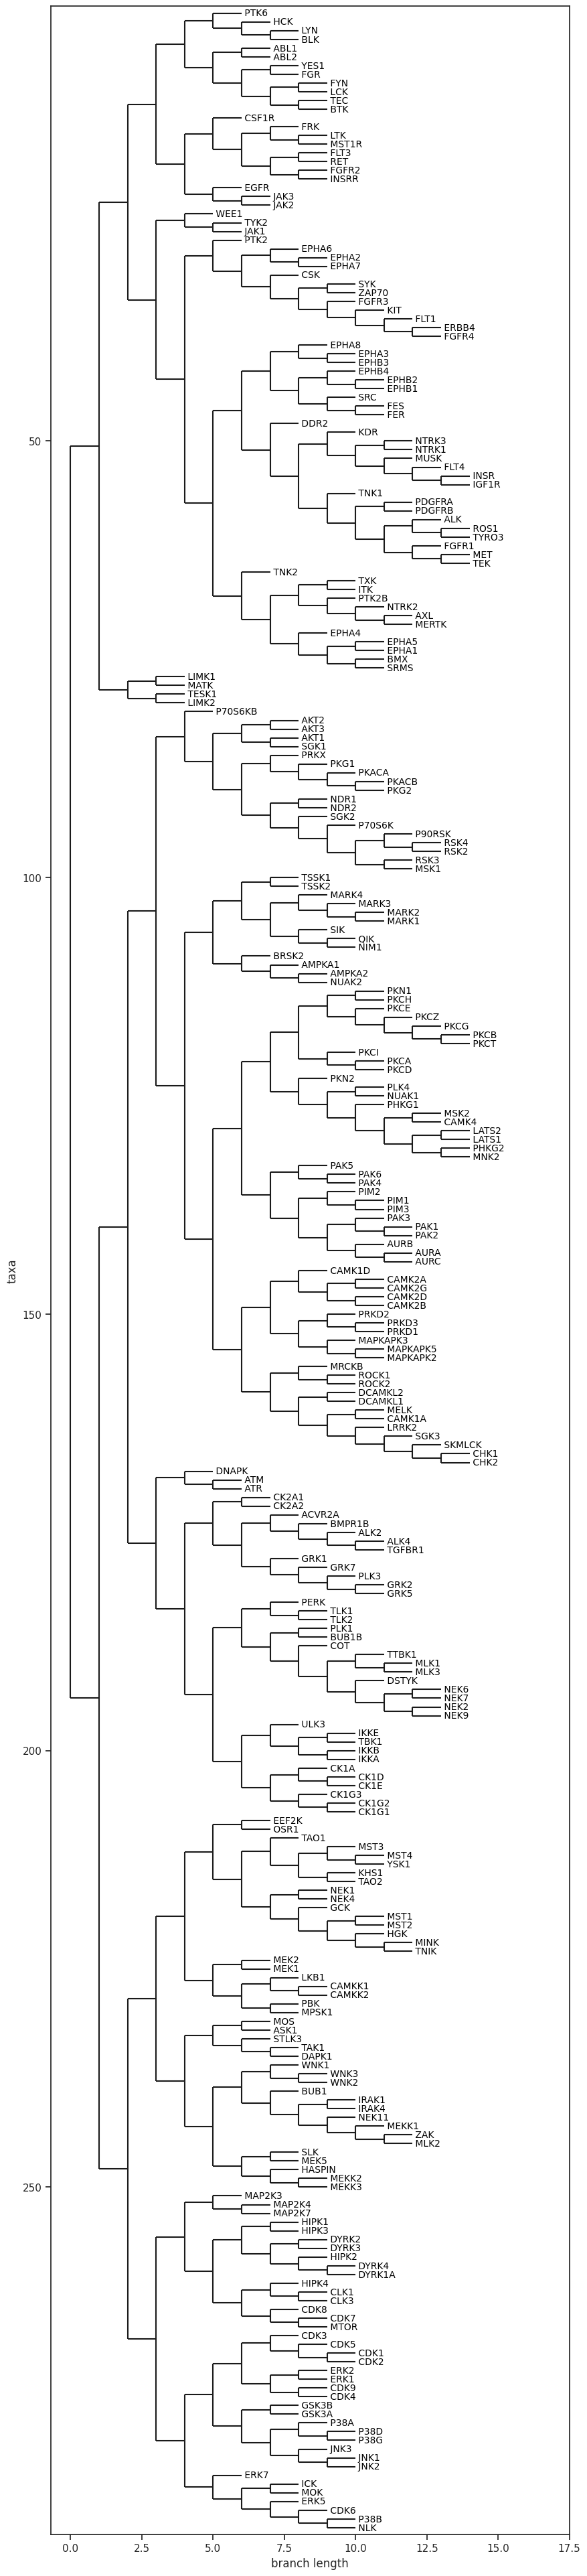

In [ ]:
linkage_matrix = get_linkage(main,plot=True, save='main') # index is kinase

In [ ]:
# import re
# others = Data.get_ks_others()

# others.index = [re.sub(r'\[(.*?)\]', r'_\1', name) for name in others.index]

# linkage_matrix = get_linkage(others,plot=True) # index is kinase

## Plot umap - cut tree

We can cut the hierarchical clustering dendrogram at a certain distance to form flat clusters.

q is 0.99


/usr/local/lib/python3.9/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


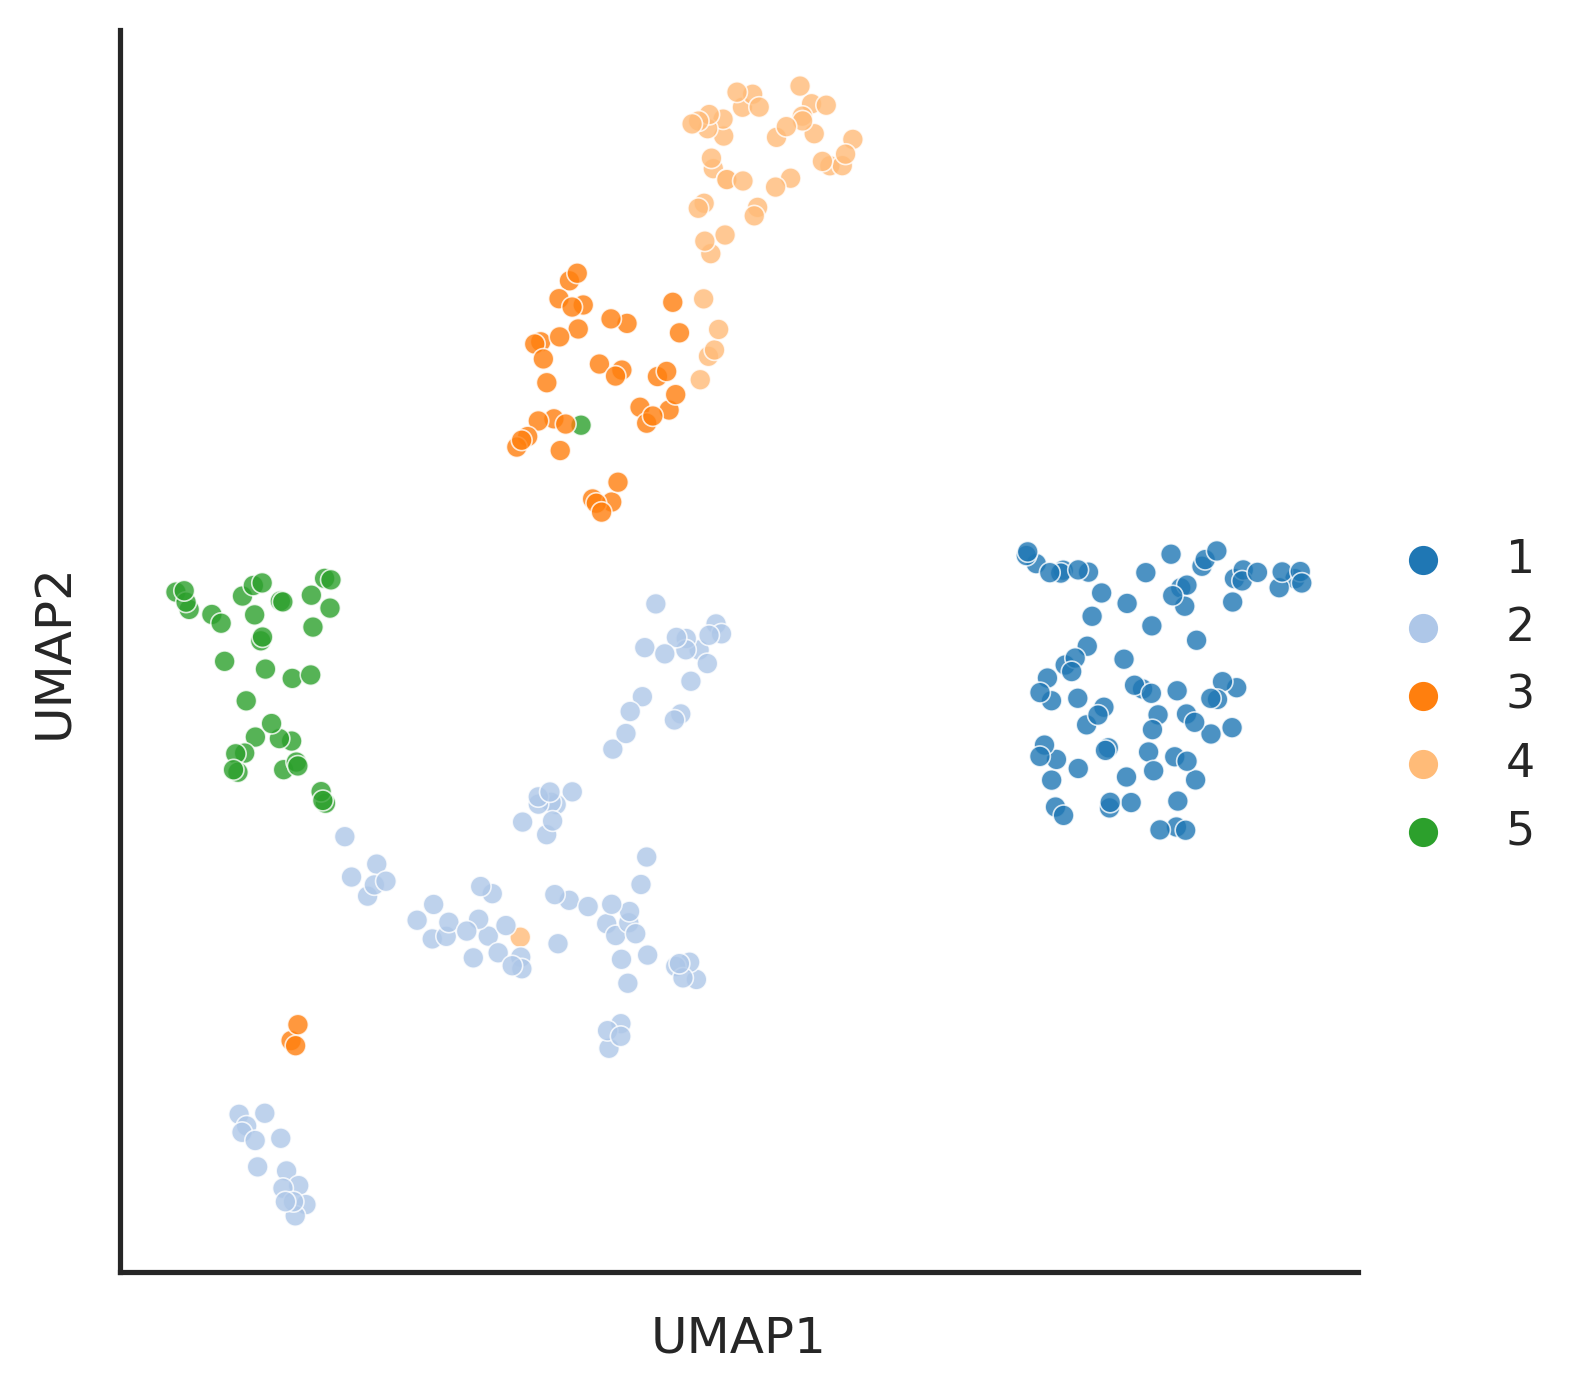

q is 0.95


/usr/local/lib/python3.9/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


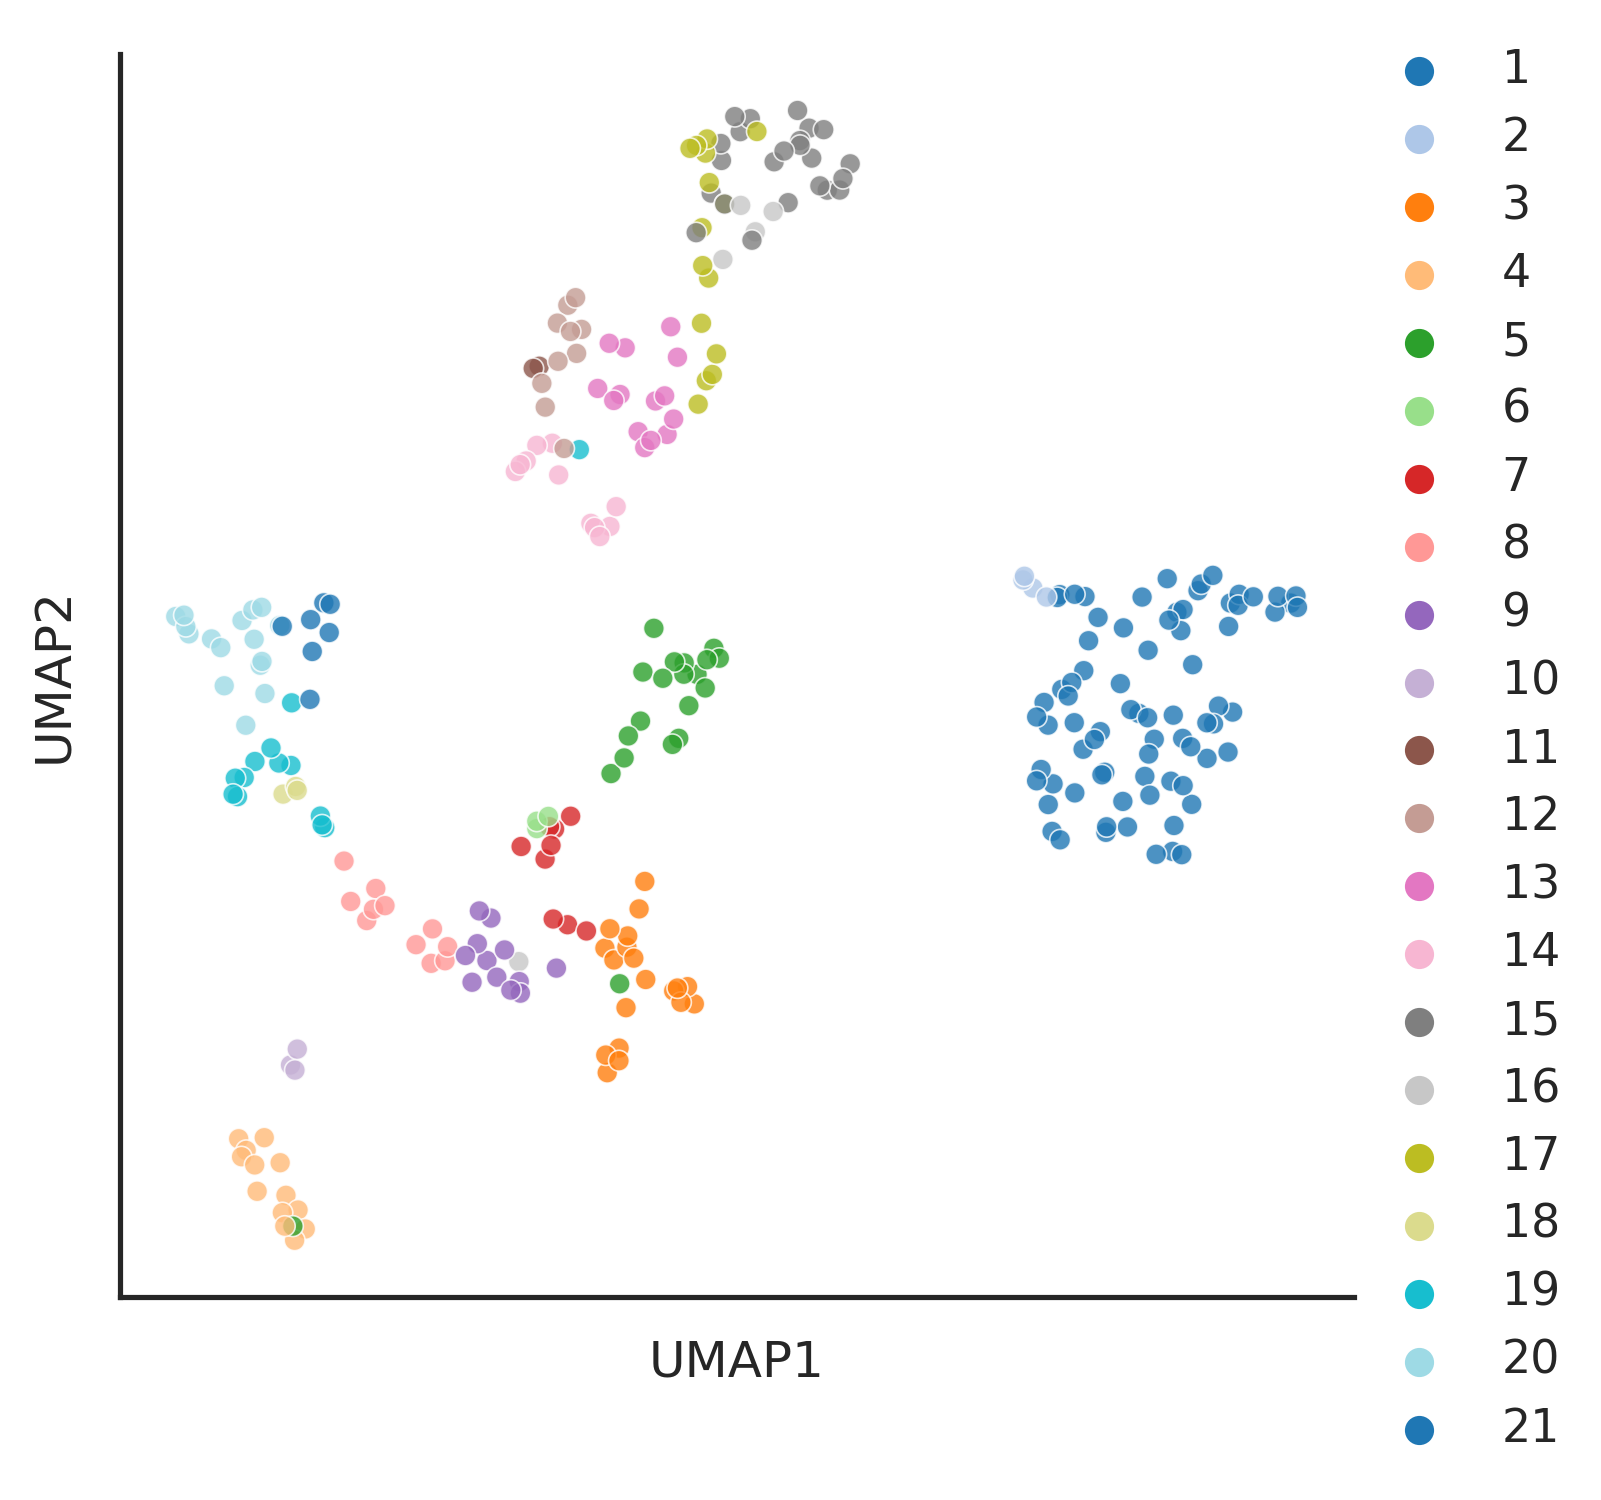

q is 0.93


/usr/local/lib/python3.9/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


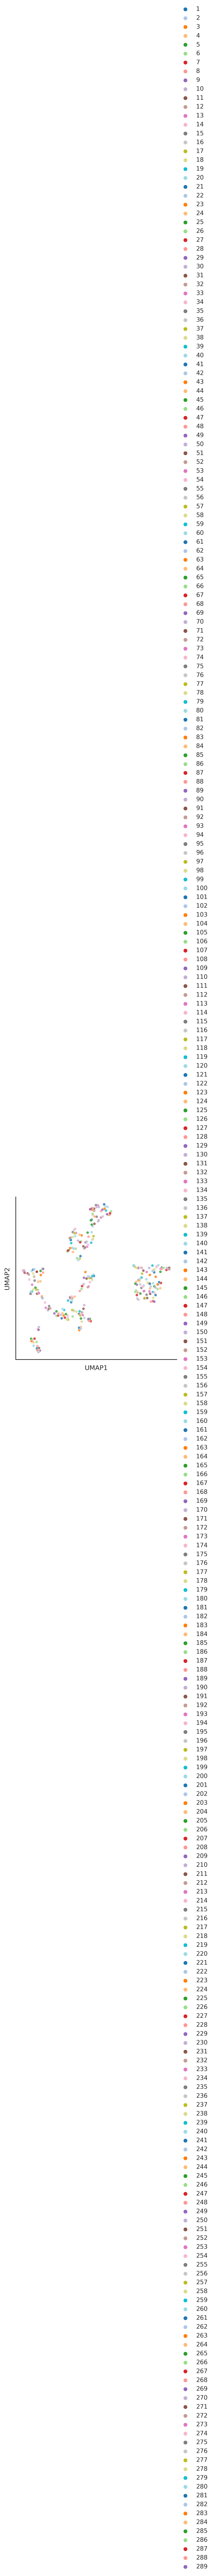

In [ ]:
for i in [0.99,0.95,0.93]:
    print(f'q is {i}') # lower value of q, more clusters
    cluster = get_hcluster(linkage_matrix, q = i)
    plot_cluster(main, hue = cluster,method= 'umap',
                 s = 25,legend=True,complexity = 6,min_dist=0.4)
    plt.show()
    plt.close()

## Save cluster

In [ ]:
info = Data.get_kinase_info_full().query('pseudo == 0')

In [ ]:
main_info = main.reset_index()[['kinase']].merge(info)

In [ ]:
main_info['big'] = cluster

In [ ]:
main_info.columns

Index(['kinase', 'ID_coral', 'uniprot', 'ID_HGNC', 'group', 'family',
       'subfamily_coral', 'subfamily', 'in_paper', 'pseudo', 'species_paper',
       'uniprot_paper', 'range', 'human_uniprot_sequence',
       'full_sequence_paper', 'sequence', 'category', 'category_big',
       'cluster', 'length', 'kinasecom_domain', 'hdbscan', 'big'],
      dtype='object')

In [ ]:
main_info.columns

Index(['kinase', 'ID_coral', 'uniprot', 'ID_HGNC', 'group', 'family',
       'subfamily_coral', 'subfamily', 'in_paper', 'pseudo', 'species_paper',
       'uniprot_paper', 'range', 'human_uniprot_sequence',
       'full_sequence_paper', 'sequence', 'category', 'category_big',
       'cluster', 'length', 'kinasecom_domain', 'hdbscan', 'hierarchical_big',
       'hierarchical_small'],
      dtype='object')

In [ ]:
# main_info.to_excel('raw/hierarchical_cluster.xlsx',index=False)

## Plot

In [ ]:
# For plotting
main = main.reset_index(drop=True)

In [ ]:
# plot_cluster(main, method='umap',hue = main_info.group,
#               s = 25,legend=True,complexity = 6,min_dist=0.4)

/usr/local/lib/python3.9/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Text(0.5, 1.0, 'Data-driven substrate specificities \ncolored by hierarchical clustering')

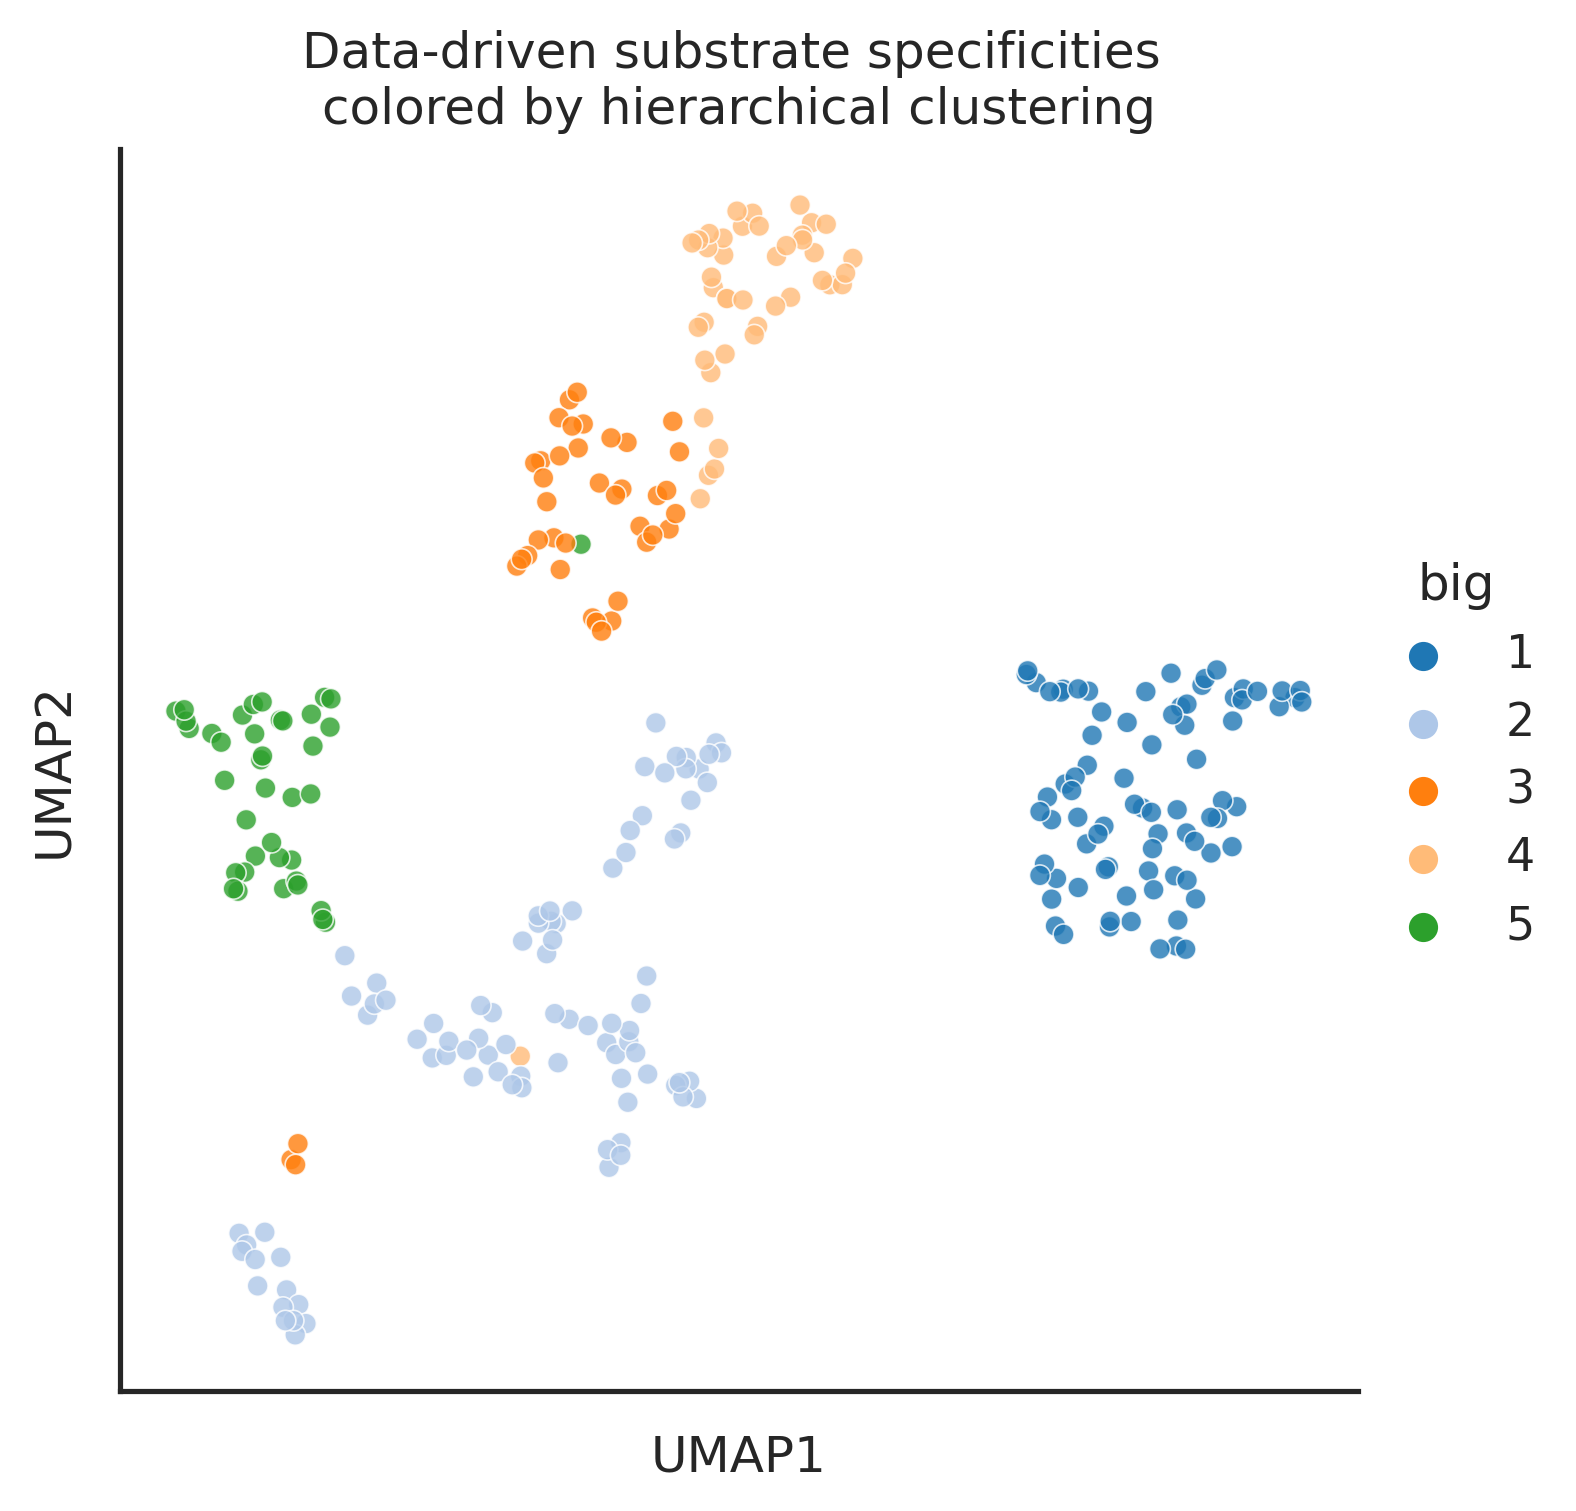

In [ ]:
plot_cluster(main, method='umap',hue = main_info.big,
              s = 25,legend=True,complexity = 6,min_dist=0.4)
plt.title('Data-driven substrate specificities \ncolored by hierarchical clustering')